# Q1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

In [53]:
air_data = pd.read_excel('AirQualityUCI.xlsx')

In [ ]:
air_data.head()

# Q1: Part1
# Describe why a linear regression model may be appropriate to describe the relationship between Column C “CO (GT)” & Column H “NOx (GT)”, by code & graphs.

# Establishing linear relation By graphs 

In [55]:
#Plots Column C “CO (GT)” & Column H “NOx (GT)”

In [57]:
## removing missing values from CO(GT) and NOx(GT)
df2 = air_data
#dropping rows with column 'CO(GT)' as -200 
df2.drop(df2[df2['CO(GT)'] == -200].index, inplace = True)
print(df2.shape)

#dropping rows with column 'NOx(GT)' as -200 
df2.drop(df2[df2['NOx(GT)'] == -200].index, inplace = True)
print(df2.shape)


(7261, 16)
(7261, 16)


Text(0,0.5,'NOx(GT)')

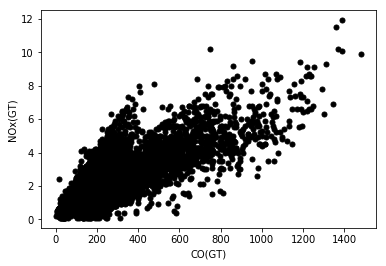

In [58]:
#using scatter plot
plt.scatter(df2['NOx(GT)'],df2['CO(GT)'], color='k', s=25, marker="o")
plt.xlabel('CO(GT)')
plt.ylabel('NOx(GT)')

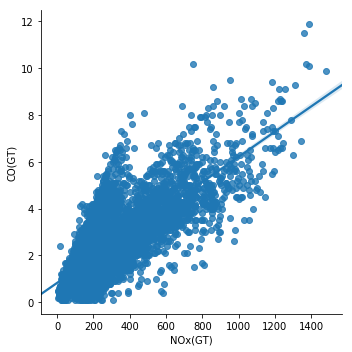

In [59]:

#using lmplot of seaborn
sns.lmplot(x="NOx(GT)", y="CO(GT)", data=df2[['NOx(GT)','CO(GT)']])

# Establishing linear relation by code

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline
import statsmodels.api as sm
from scipy import stats

In [61]:
df2 = air_data
#dropping rows with column 'CO(GT)' as -200 
df2.drop(df2[df2['CO(GT)'] == -200].index, inplace = True)
print(df2.shape)

#dropping rows with column 'NOx(GT)' as -200 
df2.drop(df2[df2['NOx(GT)'] == -200].index, inplace = True)
print(df2.shape)

(7261, 16)
(7261, 16)


In [62]:
y = df2['CO(GT)']
X = df2['NOx(GT)']

In [63]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 CO(GT)   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                 1.247e+04
Date:                Sun, 15 Dec 2019   Prob (F-statistic):               0.00
Time:                        18:46:47   Log-Likelihood:                -9410.0
No. Observations:                7261   AIC:                         1.882e+04
Df Residuals:                    7259   BIC:                         1.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8313      0.016     51.642      0.0

In [ ]:
#Conclusion:
#Since p value is less than 0.05 we can assume that linear regression will hold true between CO(GT) and NOx(GT)

# Q1 part2: Try to understand which functions from Pandas, Numpy V/s sklearn library which perform better than other with explanations for question 1.

# sklearn for regression in Column C “CO (GT)” & Column H “NOx (GT)”

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
%%time
regressor = LinearRegression()
y = np.array(df2['CO(GT)'])
x = np.array(df2['NOx(GT)']).reshape(-1, 1)
regressor.fit(x,y)

print("intercept w0 using sklearn's linear regression is",regressor.intercept_)
print("weight w1 using sklearn's linear regression is",regressor.coef_)
print("R^2 value using sklearn's linear regression is",regressor.score(x,y))


intercept w0 using sklearn's linear regression is 0.8313495660727288
weight w1 using sklearn's linear regression is [0.00538311]
R^2 value using sklearn's linear regression is 0.6321102557999801
Wall time: 10.3 ms


# using numpy and pandas for regression in Column C “CO (GT)” & Column H “NOx (GT)”

In [74]:
y1 = (df2['CO(GT)']).values
x1 = (df2['NOx(GT)']).values


In [75]:
# we will be using numpy's np.polyfit function

In [76]:
%%time
reg_np = np.polyfit(x1,y1,1)
print("intercept w0 using using numpy and pandas is",reg_np[0])
print("coefficient w1 using using numpy and pandas is",reg_np[1])

intercept w0 using using numpy and pandas is 0.0053831118536137096
coefficient w1 using using numpy and pandas is 0.8313495660727296
Wall time: 4 ms


In [77]:
#Conclusion: sklearn's LinearRegression takes 7.99 ms as compared to numpy's polyfit function which has wall time of 0 ns
#Therefore numpy's polyfit function performs better

# Q2

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import pandas as pd
%matplotlib inline

In [2]:
air_data = pd.read_excel('AirQualityUCI.xlsx')

In [3]:
air_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Date_Time
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,3/10/04 18:00:00
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,3/10/04 19:00:00
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,3/10/04 20:00:00
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,3/10/04 21:00:00
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,3/10/04 22:00:00


In [4]:
air_data.shape

(9357, 16)

In [5]:

#dropping rows with column 'CO(GT)' as -200 
air_data.drop(air_data[air_data['CO(GT)'] == -200].index, inplace = True)
print(air_data.shape)

(7674, 16)


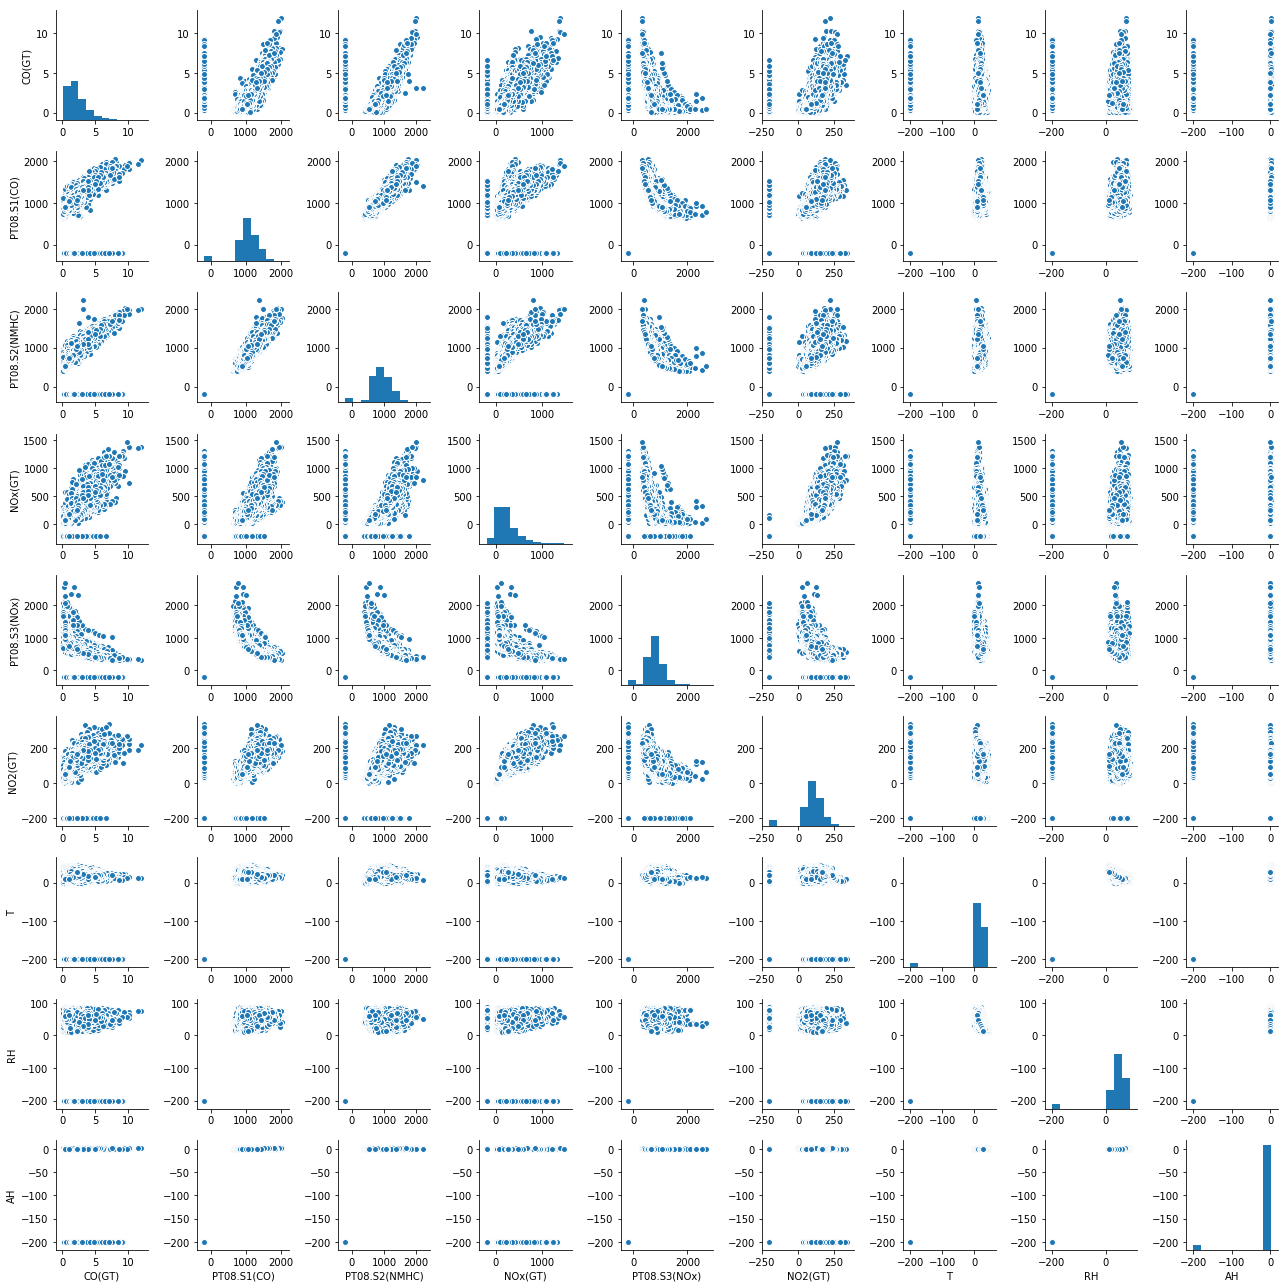

In [6]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
features_plot = ['CO(GT)','PT08.S1(CO)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','T','RH','AH']
data_to_plot = air_data[features_plot]
#data_to_plot = scalar.fit_transform(data_to_plot)
data_to_plot = pd.DataFrame(data_to_plot)

sns.pairplot(data_to_plot, size=2.0);
plt.tight_layout()
plt.legend()
plt.show()

# Q2 part 2
#Name combination of attributes which suggest good air quality

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
%matplotlib inline

In [81]:
air_data = pd.read_excel('AirQualityUCI.xlsx')

In [82]:

#dropping rows with column 'CO(GT)' as -200 
air_data.drop(air_data[air_data['CO(GT)'] == -200].index, inplace = True)
print(air_data.shape)

(7674, 16)


In [83]:
features_plot = ['CO(GT)','PT08.S1(CO)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','T','RH','AH']

#data_to_plot = scalar.fit_transform(data_to_plot)
features = air_data[features_plot]
#x = pd.DataFrame(x)
features = features.drop('CO(GT)',axis=1)
features.head()

,PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),T,RH,AH
0,1360.00,1045.50,166.0,1056.25,113.0,13.60,48.875001,0.757754
1,1292.25,954.75,103.0,1173.75,92.0,13.30,47.700000,0.725487
2,1402.00,939.25,131.0,1140.00,114.0,11.90,53.975000,0.750239
3,1375.50,948.25,172.0,1092.00,122.0,11.00,60.000000,0.786713
4,1272.25,835.50,131.0,1205.00,116.0,11.15,59.575001,0.788794


In [84]:
labels = air_data['CO(GT)'].values
features_0 = features.values

# Step1: chose M0
#Let M0 denote the null model , which contains no predictors. 
#This model simply predicts the sample mean for each observation.

#getting M0

In [86]:
#Train and test portions
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(features_0, labels, test_size=0.3)

In [87]:
y_pred_0 = np.mean(features_0)

# Step 2:
#For k = 0, 1, 2, . . .D-1:
#(a) Consider all D − k models that augment the predictors in Mk with one additional predictor.
#(b) Choose the best among these D − k models, and call it Mk+1.
#Here best is defined as having smallest RSS on training dataset (or highest R2).

#getting M1

In [88]:
features_plot = ['PT08.S1(CO)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','T','RH','AH']
features = air_data[features_plot]

for items in features_plot:
    f = features[items].values.reshape((-1, 1))
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(f, labels, test_size=0.3)
    regressor = LinearRegression()
    regressor.fit(X_train_1, y_train_1)
    print(items,"R^2:",np.around(regressor.score(X_train_1, y_train_1),decimals=3))

PT08.S1(CO) R^2: 0.224
PT08.S2(NMHC) R^2: 0.352
NOx(GT) R^2: 0.569
PT08.S3(NOx) R^2: 0.327
NO2(GT) R^2: 0.252
T R^2: 0.003
RH R^2: 0.005
AH R^2: 0.008


In [89]:
#Hence M1: NOx(GT) 0.569 as R^2 on train set

In [90]:
f_1 = features[['NOx(GT)']].values.reshape((-1,1))
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(f_1, labels, test_size=0.3)
regressor_1 = LinearRegression()
regressor_1.fit(X_train_1, y_train_1)
np.around(regressor_1.score(X_test_1, y_test_1),decimals=4)

0.5759

In [ ]:
#Hence M1: NOx(GT) 0.5759 as R^2 on test set

#getting M2

In [91]:
features_plot_2 = ['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','NO2(GT)','T','RH','AH']
features = air_data[features_plot]

for items in features_plot_2:
    f = features[['NOx(GT)',items]].values
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(f, labels, test_size=0.3)
    regressor = LinearRegression()
    regressor.fit(X_train_1, y_train_1)
    print("NOx(GT),",items,"R^2:",np.around(regressor.score(X_train_1, y_train_1),decimals=3))

NOx(GT), PT08.S1(CO) R^2: 0.632
NOx(GT), PT08.S2(NMHC) R^2: 0.68
NOx(GT), PT08.S3(NOx) R^2: 0.622
NOx(GT), NO2(GT) R^2: 0.599
NOx(GT), T R^2: 0.577
NOx(GT), RH R^2: 0.587
NOx(GT), AH R^2: 0.585


In [92]:
#Hence M2: NOx(GT), PT08.S2(NMHC) 0.68 as R^2 on train set

In [93]:
f_2 = features[['NOx(GT)','PT08.S2(NMHC)']].values
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(f_2, labels, test_size=0.3)
regressor_2 = LinearRegression()
regressor_2.fit(X_train_2, y_train_2)
np.around(regressor_2.score(X_test_2, y_test_2),decimals=4)

0.6773

In [94]:
#Hence M2: NOx(GT), PT08.S2(NMHC) 0.6773 as R^2 on test set

#getting M3

In [95]:
features_plot_3 = ['PT08.S1(CO)','PT08.S3(NOx)','NO2(GT)','T','RH','AH']
features = air_data[features_plot]

for items in features_plot_3:
    f = features[['NOx(GT)','PT08.S2(NMHC)',items]].values
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(f, labels, test_size=0.3)
    regressor = LinearRegression()
    regressor.fit(X_train_1, y_train_1)
    print("NOx(GT),PT08.S2(NMHC),",items,"R^2:",np.around(regressor.score(X_train_1, y_train_1),decimals=3))

NOx(GT),PT08.S2(NMHC), PT08.S1(CO) R^2: 0.705
NOx(GT),PT08.S2(NMHC), PT08.S3(NOx) R^2: 0.765
NOx(GT),PT08.S2(NMHC), NO2(GT) R^2: 0.685
NOx(GT),PT08.S2(NMHC), T R^2: 0.847
NOx(GT),PT08.S2(NMHC), RH R^2: 0.8
NOx(GT),PT08.S2(NMHC), AH R^2: 0.852


In [96]:
#Hence M3: NOx(GT), PT08.S2(NMHC), AH 0.852 as R^2 on train set

In [111]:
f_3 = features[['NOx(GT)','PT08.S2(NMHC)','AH']].values
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(f_3, labels, test_size=0.3)
regressor_3 = LinearRegression()
regressor_3.fit(X_train_3, y_train_3)
np.around(regressor_3.score(X_test_3, y_test_3),decimals=4)

0.8468

In [ ]:
#Hence M3: NOx(GT), PT08.S2(NMHC), AH 0.8468 as R^2 on test set

#getting M4

In [112]:
features_plot_4 = ['PT08.S1(CO)','PT08.S3(NOx)','NO2(GT)','T','RH']
features = air_data[features_plot]

for items in features_plot_4:
    f = features[['NOx(GT)','PT08.S2(NMHC)','AH',items]].values
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(f, labels, test_size=0.3)
    regressor = LinearRegression()
    regressor.fit(X_train_1, y_train_1)
    print("NOx(GT),PT08.S2(NMHC),AH,",items,"R^2:",np.around(regressor.score(X_train_1, y_train_1),decimals=4))

NOx(GT),PT08.S2(NMHC),AH, PT08.S1(CO) R^2: 0.8481
NOx(GT),PT08.S2(NMHC),AH, PT08.S3(NOx) R^2: 0.8478
NOx(GT),PT08.S2(NMHC),AH, NO2(GT) R^2: 0.8496
NOx(GT),PT08.S2(NMHC),AH, T R^2: 0.8514
NOx(GT),PT08.S2(NMHC),AH, RH R^2: 0.8438


In [113]:
#Hence M4: NOx(GT),PT08.S2(NMHC),AH, T 0.8514 as R^2 for train set

In [114]:
f_4 = features[['NOx(GT)','PT08.S2(NMHC)','AH','T']].values
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(f_4, labels, test_size=0.3)
regressor_4 = LinearRegression()
regressor_4.fit(X_train_4, y_train_4)
np.around(regressor_4.score(X_test_4, y_test_4),decimals=4)

0.8504

In [101]:
#Hence M4: NOx(GT),PT08.S2(NMHC),AH, T 0.8504 as R^2 for test set

#getting M5

In [115]:
features_plot_5 = ['PT08.S1(CO)','PT08.S3(NOx)','NO2(GT)','RH']
features = air_data[features_plot]

for items in features_plot_5:
    f = features[['NOx(GT)','PT08.S2(NMHC)','AH','T',items]].values
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(f, labels, test_size=0.3)
    regressor = LinearRegression()
    regressor.fit(X_train_1, y_train_1)
    print("NOx(GT),PT08.S2(NMHC),AH,T,",items,"R^2:",np.around(regressor.score(X_train_1, y_train_1),decimals=4))

NOx(GT),PT08.S2(NMHC),AH,T, PT08.S1(CO) R^2: 0.8562
NOx(GT),PT08.S2(NMHC),AH,T, PT08.S3(NOx) R^2: 0.8571
NOx(GT),PT08.S2(NMHC),AH,T, NO2(GT) R^2: 0.8584
NOx(GT),PT08.S2(NMHC),AH,T, RH R^2: 0.8531


In [103]:
#Hence M5: NOx(GT),PT08.S2(NMHC),AH,T, NO2(GT) 0.8584 as R^2 for train set

In [116]:
f_5 = features[['NOx(GT)','PT08.S2(NMHC)','AH','T','NO2(GT)']].values
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(f_5, labels, test_size=0.3)
regressor_5 = LinearRegression()
regressor_5.fit(X_train_5, y_train_5)
np.around(regressor_5.score(X_test_5, y_test_5),decimals=4)

0.8563

In [105]:
#Hence M5: NOx(GT),PT08.S2(NMHC),AH,T, NO2(GT) 0.8563 as R^2 for test set

#getting M6

In [117]:
features_plot_6 = ['PT08.S1(CO)','PT08.S3(NOx)','RH']
features = air_data[features_plot]

for items in features_plot_6:
    f = features[['NOx(GT)','PT08.S2(NMHC)','AH','T','NO2(GT)',items]].values
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(f, labels, test_size=0.3)
    regressor = LinearRegression()
    regressor.fit(X_train_1, y_train_1)
    print("NOx(GT),PT08.S2(NMHC),AH,T,NO2(GT),",items,"R^2:",np.around(regressor.score(X_train_1, y_train_1),decimals=4))

NOx(GT),PT08.S2(NMHC),AH,T,NO2(GT), PT08.S1(CO) R^2: 0.8687
NOx(GT),PT08.S2(NMHC),AH,T,NO2(GT), PT08.S3(NOx) R^2: 0.8647
NOx(GT),PT08.S2(NMHC),AH,T,NO2(GT), RH R^2: 0.8552


In [118]:
#Hence M6: NOx(GT),PT08.S2(NMHC),AH,T,NO2(GT), PT08.S1(CO) R^2: 0.8687 on train set

In [119]:
f_6 = features[['NOx(GT)','PT08.S2(NMHC)','AH','T','NO2(GT)','PT08.S1(CO)']].values
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(f_6, labels, test_size=0.3)
regressor_6 = LinearRegression()
regressor_6.fit(X_train_6, y_train_6)
np.around(regressor_6.score(X_test_6, y_test_6),decimals=4)

0.8514

In [120]:
#Hence M6: NOx(GT),PT08.S2(NMHC),AH,T,NO2(GT), PT08.S1(CO) R^2: 0.8514 on test set

#getting M7

In [122]:
features_plot_7 = ['PT08.S3(NOx)','RH']
features = air_data[features_plot]

for items in features_plot_7:
    f = features[['NOx(GT)','PT08.S2(NMHC)','AH','T','NO2(GT)','PT08.S1(CO)',items]].values
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(f, labels, test_size=0.3)
    regressor = LinearRegression()
    regressor.fit(X_train_1, y_train_1)
    print("NOx(GT),PT08.S2(NMHC),AH,T,NO2(GT),PT08.S1(CO),",items,"R^2:",np.around(regressor.score(X_train_1, y_train_1),decimals=4))

NOx(GT),PT08.S2(NMHC),AH,T,NO2(GT),PT08.S1(CO), PT08.S3(NOx) R^2: 0.8715
NOx(GT),PT08.S2(NMHC),AH,T,NO2(GT),PT08.S1(CO), RH R^2: 0.8623


In [ ]:
#Hence M7: NOx(GT),PT08.S2(NMHC),AH,T,NO2(GT),PT08.S1(CO), PT08.S3(NOx) R^2: 0.8715 on train set

In [123]:
f_7 = features[['NOx(GT)','PT08.S2(NMHC)','AH','T','NO2(GT)','PT08.S1(CO)','PT08.S3(NOx)']].values
X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(f_7, labels, test_size=0.3)
regressor_7 = LinearRegression()
regressor_7.fit(X_train_7, y_train_7)
np.around(regressor_7.score(X_test_7, y_test_7),decimals=4)

0.8502

In [124]:
#Hence M7: NOx(GT),PT08.S2(NMHC),AH,T,NO2(GT),PT08.S1(CO), PT08.S3(NOx) R^2: 0.8502 on test set

#getting M8

In [125]:
features_plot_8 = ['RH']
features = air_data[features_plot]

for items in features_plot_8:
    f = features[['NOx(GT)','PT08.S2(NMHC)','AH','T','NO2(GT)','PT08.S1(CO)','PT08.S3(NOx)',items]].values
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(f, labels, test_size=0.3)
    regressor = LinearRegression()
    regressor.fit(X_train_1, y_train_1)
    print("NOx(GT),PT08.S2(NMHC),AH,T,NO2(GT),PT08.S1(CO),PT08.S3(NOx),",items,"R^2:",np.around(regressor.score(X_train_1, y_train_1),decimals=4))

NOx(GT),PT08.S2(NMHC),AH,T,NO2(GT),PT08.S1(CO),PT08.S3(NOx), RH R^2: 0.8706


In [ ]:
#Hence M8: NOx(GT),PT08.S2(NMHC),AH,T,NO2(GT),PT08.S1(CO),PT08.S3(NOx), RH R^2: 0.8706 on train set

In [126]:
f_8 = features[['NOx(GT)','PT08.S2(NMHC)','AH','T','NO2(GT)','PT08.S1(CO)','PT08.S3(NOx)','RH']].values
X_train_8, X_test_8, y_train_8, y_test_8 = train_test_split(f_8, labels, test_size=0.3)
regressor_8 = LinearRegression()
regressor_8.fit(X_train_8, y_train_8)
np.around(regressor_8.score(X_test_8, y_test_8),decimals=4)

0.8646

In [ ]:
#Hence M8: NOx(GT),PT08.S2(NMHC),AH,T,NO2(GT),PT08.S1(CO),PT08.S3(NOx),RH R^2: 0.8646 on test set

# Step 3:
#Select a single best model from among M0, M1 , . . . , MD having the smallest RSS on testing error 
##(or equivalently largest R2)

In [ ]:
##R^2 of M1,M2,..,M8 on test set

#M1: NOx(GT) 0.5759 as R^2 on test set
#M2: NOx(GT), PT08.S2(NMHC) 0.6773 as R^2 on test set
#M3: NOx(GT), PT08.S2(NMHC), AH 0.8468 as R^2 on test set
#M4: NOx(GT),PT08.S2(NMHC),AH, T 0.8504 as R^2 for test set
#M5: NOx(GT),PT08.S2(NMHC),AH,T, NO2(GT) 0.8563 as R^2 for test set
#M6: NOx(GT),PT08.S2(NMHC),AH,T,NO2(GT), PT08.S1(CO) R^2: 0.8514 on test set
#M7: NOx(GT),PT08.S2(NMHC),AH,T,NO2(GT),PT08.S1(CO), PT08.S3(NOx) R^2: 0.8502 on test set
#M8: NOx(GT),PT08.S2(NMHC),AH,T,NO2(GT),PT08.S1(CO),PT08.S3(NOx),RH R^2: 0.8646 on test set

#M8:NOx(GT),PT08.S2(NMHC),AH,T,NO2(GT),PT08.S1(CO),PT08.S3(NOx),RH R^2: 0.8646 on test set

# Therefore we will take the following features
# NOx(GT), PT08.S2(NMHC), AH, T, NO2(GT), PT08.S1(CO), PT08.S3(NOx), RH

# Q2 part 1
# Implement regression model using gradient descent algorithm to predict which days are good for living, with justifications.
#Solve this problem using gradient descent algorithm [3 Marks]
#Solve this problem using stochastic gradient descent algorithm [3 Marks]
#Solve this problem using mini-batch gradient descent algorithm [3 Marks]

# features vs labels

In [127]:
features_plot = ['CO(GT)','NOx(GT)', 'PT08.S2(NMHC)', 'AH', 'T', 'NO2(GT)', 'PT08.S1(CO)', 'PT08.S3(NOx)', 'RH']

#data_to_plot = scalar.fit_transform(data_to_plot)
features = air_data[features_plot]
#x = pd.DataFrame(x)
features = features.drop('CO(GT)',axis=1)
features.head()

,NOx(GT),PT08.S2(NMHC),AH,T,NO2(GT),PT08.S1(CO),PT08.S3(NOx),RH
0,166.0,1045.50,0.757754,13.60,113.0,1360.00,1056.25,48.875001
1,103.0,954.75,0.725487,13.30,92.0,1292.25,1173.75,47.700000
2,131.0,939.25,0.750239,11.90,114.0,1402.00,1140.00,53.975000
3,172.0,948.25,0.786713,11.00,122.0,1375.50,1092.00,60.000000
4,131.0,835.50,0.788794,11.15,116.0,1272.25,1205.00,59.575001


In [128]:
labels1 = air_data['CO(GT)'].values
features1 = features.values

#Train and test portions

In [129]:
from sklearn.cross_validation import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(features1, labels1, test_size=0.3)

In [131]:

print("X_trian shape --> {}".format(X_train.shape))
print("y_train shape --> {}".format(y_train.shape))
print("X_test shape --> {}".format(X_test.shape))
print("y_test shape --> {}".format(y_test.shape))

X_trian shape --> (5371, 8)
y_train shape --> (5371,)
X_test shape --> (2303, 8)
y_test shape --> (2303,)


# Sklearn Linear Regression

In [132]:
from sklearn.linear_model import LinearRegression

In [133]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [134]:
print("Predicted values:", regressor.predict(X_test))

Predicted values: [1.76835492 2.35505856 1.06273362 ... 0.3339921  2.77934173 1.68577626]


In [135]:
print("R^2 score for liner regression: ", regressor.score(X_train, y_train))

R^2 score for liner regression:  0.8678310741165494


In [136]:
print("R^2 score for liner regression on test set: ", regressor.score(X_test, y_test))

R^2 score for liner regression on test set:  0.8753665313888319


# Gradient descent

In [137]:
#x = features
#y = air_data['CO(GT)']

In [138]:
#scaling the features and labels
#y = (y_train-y_train.mean())/y_train.std()
y = y_train
x = (pd.DataFrame(X_train) - pd.DataFrame(X_train).mean()) / pd.DataFrame(X_train).std()
x.head()

#Adding column of ones to training data
x.insert(0, 'Ones', 1)
x.head()

,Ones,0,1,2,3,4,5,6,7
0,1,-0.389432,-0.389037,0.220729,0.236709,0.109027,0.417786,-0.238870,0.185734
1,1,-0.325212,0.643572,0.223919,0.400640,0.238569,0.182529,-0.024119,-0.062356
2,1,1.312195,0.625171,0.224423,0.115775,0.041943,0.623636,-0.576553,0.744164
3,1,1.982468,1.537463,0.214482,0.218434,1.470367,1.378898,-1.094839,-0.003287
4,1,1.742598,1.013726,0.215137,0.032466,1.388247,1.274179,-0.887677,0.543784


In [139]:


# Parameters required for Gradient Descent
alpha = 0.001   #learning rate
m = y.size  #no. of samples
print(m)
np.random.seed(10)
theta = np.random.rand(x.shape[1])  #initializing theta with some random values
print(theta)

5371
[0.77132064 0.02075195 0.63364823 0.74880388 0.49850701 0.22479665
 0.19806286 0.76053071 0.16911084]


In [140]:
#defining simple gradient descent function
def gradient_descent(x, y, m, theta, alpha):
    cost_list = []   #to record all cost values to this list
    theta_list = []  #to record all theta values to this list 
    prediction_list = []
    run = True
    cost_list.append(1e10)    #we append some large value to the cost list
    i=0
    while run:
        prediction = np.dot(x, theta)   #predicted y values theta_0*x0+theta_1*x1+...
        prediction_list.append(prediction)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)   #  (1/2m)*sum[(error)^2]
        cost_list.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))   # alpha * (1/m) * sum[error*x]
        theta_list.append(theta)
        if cost_list[i]-cost_list[i+1] < 1e-9:   #checking if the change in cost function is less than 10^(-9)
            run = False

        i+=1
    cost_list.pop(0)   # Remove the large number we added in the begining 
    return prediction_list, cost_list, theta_list

In [141]:
prediction_list, cost_list, theta_list = gradient_descent(x, y, m, theta, alpha)
theta = theta_list[-1]

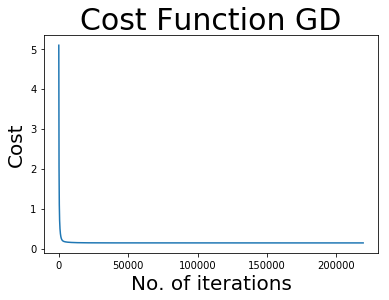

In [142]:
plt.title('Cost Function GD', size = 30)
plt.xlabel('No. of iterations', size=20)
plt.ylabel('Cost', size=20)
plt.plot(cost_list)
plt.show()
#print(cost_list)

In [143]:


print(y[0:])
print(prediction_list[-1].T)

[1.2 2.5 3.4 ... 2.3 1.3 1.5]
[1.26869847 2.44118655 3.4256528  ... 3.05399225 1.54803985 1.85553962]


In [144]:
##R^2 on train set

# sum of square of residuals
ssr = np.sum((prediction_list[-1] - y)**2)
print(ssr)

#  total sum of squares
sst = np.sum((y - np.mean(y))**2)
print(sst)

# R2 score
r2_score = 1 - (ssr/sst)
print("R^2 score with gradient descent on train set is",r2_score)

1501.7382657415772
11354.153885682368
R^2 score with gradient descent on train set is 0.8677366644083206


In [145]:
#R^2 on test set
x_test_sc = pd.DataFrame(X_test)
x_test_sc = (x_test_sc - x_test_sc.mean())/x_test_sc.std()

x_test_sc.insert(0, 'Ones', 1)

#y_test_sc = (y_test - y_test.mean())/y_test.std()
y_test_sc = y_test
y_test_pred = np.dot(x_test_sc,theta.T)


# sum of square of residuals
ssr = np.sum((y_test_pred - y_test_sc)**2)
print(ssr)

#  total sum of squares
sst = np.sum((y_test_sc - np.mean(y_test_sc))**2)
print(sst)

# R2 score
r2_score_gd = 1 - (ssr/sst)
print("R^2 score with gradient descent on test set is",r2_score_gd)

639.1774439183789
4849.545531914893
R^2 score with gradient descent on test set is 0.8681984858762646


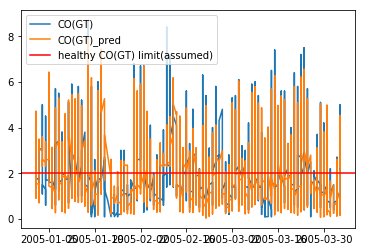

In [147]:
#predicting CO(GT) for all days
x_sc = air_data[['NOx(GT)', 'PT08.S2(NMHC)', 'AH', 'T', 'NO2(GT)', 'PT08.S1(CO)', 'PT08.S3(NOx)', 'RH']]
x_sc = (x_sc - x_sc.mean())/x_sc.std()
x_sc.insert(0, 'Ones', 1)
air_data['CO(GT)_pred'] = np.dot(x_sc,theta.T)


#Lets take a sample dataset of the airdata and see how well our GD regressor is able to predict the actual CO(GT)
air_data_sample = air_data.loc[air_data['Date'] >= '2005-01-01']
air_data_sample.head()
air_data_sample.shape

#plotting predicted and actual CO(GT) against Date
plt.plot(air_data_sample['Date'],air_data_sample['CO(GT)'])
plt.plot(air_data_sample['Date'],air_data_sample['CO(GT)_pred'])
plt.axhline(y=2, color='r', linestyle='-',label='healthy CO(GT) limit(assumed)')
plt.legend(loc= 'upper left')
plt.figure(figsize=(4,3))

# SGD

In [148]:
regressor_sgd = linear_model.SGDRegressor(loss = "squared_loss", average=True, tol=1e-9)
regressor_sgd.fit(x, y)

SGDRegressor(alpha=0.0001, average=True, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=1e-09, verbose=0,
       warm_start=False)

In [149]:
print("R^2 score for SGD regression on train set: ", regressor_sgd.score(x, y))

R^2 score for SGD regression on train set:  0.8642661453707533


In [150]:
y_test_pred = regressor_sgd.predict(x_test_sc)
print(y_test_sc[0:10])
print(y_test_pred[0:10])
print("R^2 score for SGD regression on test set: ", regressor_sgd.score(x_test_sc, y_test_sc))

[1.9 2.3 1.3 4.1 0.3 0.6 0.9 1.  0.7 2.4]
[1.90228449 2.34830393 0.95900636 3.55727358 1.18104038 0.21990788
 0.71800763 1.24570497 0.74488611 2.61605065]
R^2 score for SGD regression on test set:  0.8702143298889502


In [151]:
y_test_pred = regressor_sgd.predict(x_test_sc)
print(y_test_sc[0:10])
print(y_test_pred[0:10])

[1.9 2.3 1.3 4.1 0.3 0.6 0.9 1.  0.7 2.4]
[1.90228449 2.34830393 0.95900636 3.55727358 1.18104038 0.21990788
 0.71800763 1.24570497 0.74488611 2.61605065]


In [152]:
print("R^2 score for SGD regression on test set: ", regressor_sgd.score(x_test_sc, y_test_sc))

R^2 score for SGD regression on test set:  0.8702143298889502


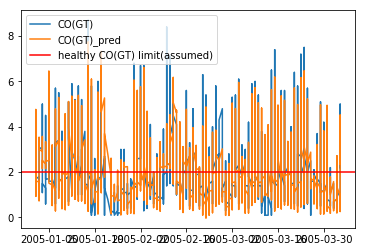

In [154]:
#predicting CO(GT) for all days
x_sc = air_data[['NOx(GT)', 'PT08.S2(NMHC)', 'AH', 'T', 'NO2(GT)', 'PT08.S1(CO)', 'PT08.S3(NOx)', 'RH']]
x_sc = (x_sc - x_sc.mean())/x_sc.std()
x_sc.insert(0, 'Ones', 1)
air_data['CO(GT)_pred'] = regressor_sgd.predict(x_sc)


#Lets take a sample dataset of the airdata and see how well our GD regressor is able to predict the actual CO(GT)
air_data_sample = air_data.loc[air_data['Date'] >= '2005-01-01']
air_data_sample.head()
air_data_sample.shape

#plotting predicted and actual CO(GT) against Date
plt.plot(air_data_sample['Date'],air_data_sample['CO(GT)'])
plt.plot(air_data_sample['Date'],air_data_sample['CO(GT)_pred'])
plt.axhline(y=2, color='r', linestyle='-',label='healthy CO(GT) limit(assumed)')
plt.legend(loc= 'upper left')
plt.figure(figsize=(2,3))

# mini batch gd

In [155]:
#y = (y_train-y_train.mean())/y_train.std()
y = y_train
x = (pd.DataFrame(X_train) - pd.DataFrame(X_train).mean()) / pd.DataFrame(X_train).std()
x.head()

print(y)

#Adding column of ones to training data
x.insert(0, 'Ones', 1)
x.head()

[1.2 2.5 3.4 ... 2.3 1.3 1.5]


,Ones,0,1,2,3,4,5,6,7
0,1,-0.389432,-0.389037,0.220729,0.236709,0.109027,0.417786,-0.238870,0.185734
1,1,-0.325212,0.643572,0.223919,0.400640,0.238569,0.182529,-0.024119,-0.062356
2,1,1.312195,0.625171,0.224423,0.115775,0.041943,0.623636,-0.576553,0.744164
3,1,1.982468,1.537463,0.214482,0.218434,1.470367,1.378898,-1.094839,-0.003287
4,1,1.742598,1.013726,0.215137,0.032466,1.388247,1.274179,-0.887677,0.543784


In [156]:
batch_size = 1000  #chunk row size
list_x = [x[i:i+batch_size] for i in range(0,x.shape[0],batch_size)]
list_x[0]

,Ones,0,1,2,3,4,5,6,7
0,1,-0.389432,-0.389037,0.220729,0.236709,0.109027,0.417786,-0.238870,0.185734
1,1,-0.325212,0.643572,0.223919,0.400640,0.238569,0.182529,-0.024119,-0.062356
2,1,1.312195,0.625171,0.224423,0.115775,0.041943,0.623636,-0.576553,0.744164
3,1,1.982468,1.537463,0.214482,0.218434,1.470367,1.378898,-1.094839,-0.003287
4,1,1.742598,1.013726,0.215137,0.032466,1.388247,1.274179,-0.887677,0.543784
5,1,-1.843534,-0.994165,0.230311,0.170598,-3.439478,-0.515353,1.612694,0.785967
6,1,-0.618669,-0.915604,0.213428,0.093201,-0.466969,-0.701838,2.892853,0.243440
7,1,-0.052169,-0.197237,0.215319,0.149637,0.578614,0.262143,-0.350419,0.187097
8,1,1.805543,1.548079,0.227561,0.254983,0.331098,1.217517,-0.933207,0.373846
9,1,1.235640,1.182879,0.217466,0.192098,1.048201,0.949266,0.027482,0.172557


In [157]:
batch_size = 1000  #chunk row size
list_y = [y[i:i+batch_size] for i in range(0,y.shape[0],batch_size)]
list_y[0].size

1000

In [158]:
# Parameters required for Gradient Descent
alpha = 0.001   #learning rate
m = y.size  #no. of samples
print(m)
np.random.seed(10)
theta = np.random.rand(x.shape[1])  #initializing theta with some random values
print(theta)

5371
[0.77132064 0.02075195 0.63364823 0.74880388 0.49850701 0.22479665
 0.19806286 0.76053071 0.16911084]


In [159]:
def gradient_descent_mini(x, y, m, theta, alpha):
    cost_list = []   #to record all cost values to this list
    theta_list = []  #to record all theta values to this list 
    prediction_list = []
    run = True
    cost_list.append(1e10)    #we append some large value to the cost list
    
    batch_size = 1000  #chunk row size
    list_x = [x[i:i+batch_size] for i in range(0,x.shape[0],batch_size)]
    list_y = [y[i:i+batch_size] for i in range(0,y.shape[0],batch_size)]
    #x = list_x[0]
    #y = list_y[0]
    for i in range(0,5,1):
        j=0
        while run:
            prediction = np.dot(list_x[i], theta)   #predicted y values theta_0*x0+theta_1*x1+...
            prediction_list.append(prediction)
            error = prediction - list_y[i]
            cost = 1/(2*(batch_size)) * np.dot(error.T, error)   #  (1/2m)*sum[(error)^2]
            cost_list.append(cost)
            theta = theta - (alpha * (1/batch_size) * np.dot(list_x[i].T, error))   # alpha * (1/m) * sum[error*x]
            theta_list.append(theta)
            
            if cost_list[j]-cost_list[j+1] < 1e-9:   #checking if the change in cost function is less than 10^(-9)
                run = False

            j+=1
        cost_list.pop(0)   # Remove the large number we added in the begining 
    
    return prediction_list, cost_list, theta_list

In [160]:
prediction_list_mini, cost_list_mini, theta_list_mini = gradient_descent_mini(x, y, m, theta, alpha)
#theta = theta_list[-1]


In [161]:
print(theta_list_mini[-1])

[ 2.14811595  0.6008582   1.21870989 -0.61293023 -0.4995619  -0.25233535
  0.53186207  0.25719421 -0.40160763]


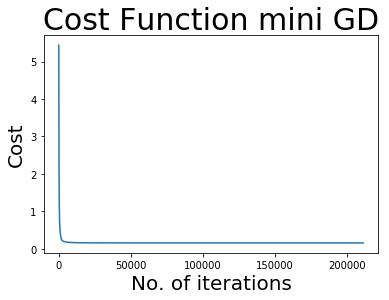

In [162]:
plt.title('Cost Function mini GD', size = 30)
plt.xlabel('No. of iterations', size=20)
plt.ylabel('Cost', size=20)
plt.plot(cost_list_mini)
plt.show()
#print(cost_list)

In [163]:
print(y[0:])
print(np.dot(theta_list_mini[-1],x.T))

[1.2 2.5 3.4 ... 2.3 1.3 1.5]
[1.24512161 2.45536677 3.37702455 ... 3.05677557 1.4716724  1.82980368]


In [164]:
#R^2 on train set

# sum of square of residuals
ssr = np.sum((np.dot(theta_list_mini[-1],x.T) - y)**2)
print(ssr)

#  total sum of squares
sst = np.sum((y - np.mean(y))**2)
print(sst)

# R2 score
r2_score = 1 - (ssr/sst)
print("R^2 score with mini gradient descent on train set is",r2_score)

1513.9886116397906
11354.153885682368
R^2 score with mini gradient descent on train set is 0.8666577336468078


In [165]:
#R^2 on test set
x_test_sc = pd.DataFrame(X_test)
x_test_sc = (x_test_sc - x_test_sc.mean())/x_test_sc.std()

x_test_sc.insert(0, 'Ones', 1)

#y_test_sc = (y_test - y_test.mean())/y_test.std()
y_test_sc = y_test
y_test_pred = np.dot(x_test_sc,theta_list_mini[-1].T)


# sum of square of residuals
ssr = np.sum((y_test_pred - y_test_sc)**2)
print(ssr)

#  total sum of squares
sst = np.sum((y_test_sc - np.mean(y_test_sc))**2)
print(sst)

# R2 score
r2_score_mini = 1 - (ssr/sst)
print("R^2 score with mini gradient descent on test set is",r2_score_mini)

646.0203431658643
4849.545531914893
R^2 score with mini gradient descent on test set is 0.8667874465938303


# Q2 part3:: Give logical explanation for selection of any one approach.
# Deciding best gradient descent model

In [166]:
print("R^2 score with gradient descent on test set is",r2_score_gd)
print("R^2 score for SGD regression on test set: ", regressor_sgd.score(x_test_sc, y_test_sc))
print("R^2 score with mini gradient descent on test set is",r2_score_mini)

R^2 score with gradient descent on test set is 0.8681984858762646
R^2 score for SGD regression on test set:  0.8702143298889502
R^2 score with mini gradient descent on test set is 0.8667874465938303


In [168]:
#Looking at the R^2 value for each of the gradient descent model, 
#SGD outperforms the other two with an R^2 of 0.87